In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Index :- coadds231p-006

# Name :- Ahamed M.S.S

# Assignment - 01


## Question - 01

### The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.This data  includes seventeen variables that are in Interpret below

#### Invoice id: Computer generated sales slip invoice identification number

#### Branch: Branch of supercenter (3 branches are available identified by A, B and C).

#### City: Location of supercenters

#### Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

#### Gender: Gender type of customer

#### Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

#### Unit price: Price of each product dollars

#### Quantity: Number of products purchased by customer

#### Tax: 5% tax fee for customer buying

#### Total: Total price including tax

#### Date: Date of purchase (Record available from January 2019 to March 2019)

#### Time: Purchase time (10am to 9pm)

#### Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

#### COGS: Cost of goods sold

#### Gross margin percentage

#### Gross income

#### Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Question - 02

### I selected this dataset on historical supermarket sales because it provides a rich source of information for predictive data analytics. With detailed attributes such as branch, customer type, product line, and payment method, it allows for comprehensive analysis of factors influencing sales. The dataset enables us to uncover patterns, make predictions, and derive insights into customer behavior and market trends. The message to the audience is to leverage predictive analytics to optimize inventory management, understand customer preferences, and enhance overall business strategies for supermarkets facing high market competition in highly populated cities.

## Question - 03

In [3]:
supermarket_sales=pd.read_csv(r'D:\NIBM-AD _Data_Science\Data Visualization\Excel files\supermarket_sales.csv')
supermarket_sales.head(10)



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [6]:
supermarket_info = supermarket_sales.info()
all_columns=supermarket_sales.columns
data_type=supermarket_sales.dtypes

print("Columns and Data Types:")
print(data_type)

print("\nInfo Summary:")
print(supermarket_info)

print("\nAll Columns:")
print(all_columns)

### There is no null values in this data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
numerical_columns = supermarket_sales.select_dtypes(include='number')
categorical_columns = supermarket_sales.select_dtypes(include='object')

# Display the numerical columns
print("Numerical Columns:")
print(numerical_columns)

# Display the categorical columns
print("Categorical Columns:")
print(categorical_columns)


Numerical Columns:
           Unit price  Quantity   Tax 5%      Total    cogs  \
Date                                                          
1/5/2019        74.69         7  26.1415   548.9715  522.83   
3/8/2019        15.28         5   3.8200    80.2200   76.40   
3/3/2019        46.33         7  16.2155   340.5255  324.31   
1/27/2019       58.22         8  23.2880   489.0480  465.76   
2/8/2019        86.31         7  30.2085   634.3785  604.17   
...               ...       ...      ...        ...     ...   
1/29/2019       40.35         1   2.0175    42.3675   40.35   
3/2/2019        97.38        10  48.6900  1022.4900  973.80   
2/9/2019        31.84         1   1.5920    33.4320   31.84   
2/22/2019       65.82         1   3.2910    69.1110   65.82   
2/18/2019       88.34         7  30.9190   649.2990  618.38   

           gross margin percentage  gross income  Rating  
Date                                                      
1/5/2019                  4.761905       26

C:\Users\Shakeeb\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 4.761904762 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Shakeeb\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.761904762 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Shakeeb\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 4.761904762 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


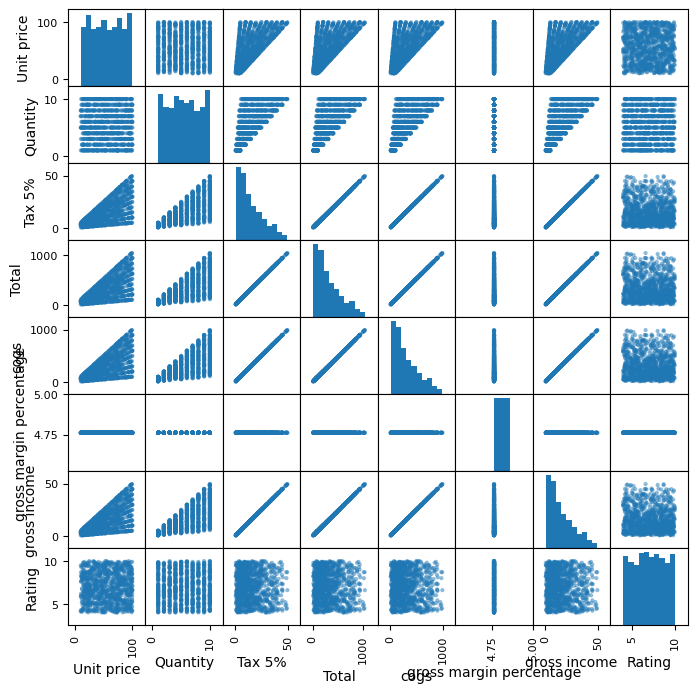

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Create a scatter matrix
scatter_matrix(numerical_columns, figsize=(8, 8), diagonal='hist',range_padding=0.5) 

# Show the plot
plt.show()

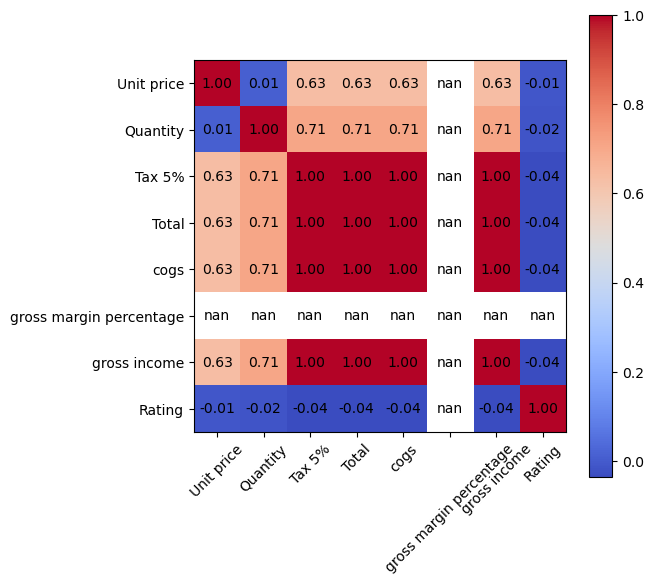

In [7]:



# Create a correlation matrix (example using the corr() method)
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Create a heatmap using Matplotlib's imshow function
heatmap = plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none")

for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Add colorbar
plt.colorbar(heatmap)

# Display the column names as labels on both axes
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Show the plot
plt.show()

## The above scatter plot and heat map shows the relationship between the variables. unit price and Gross income have postively correlated (positive relationship).Quantity and gross income also have positive relationship.Likewise we can identified the relationship with the variables using above scatter plot and heatmap for our analysis.

## Question - 04

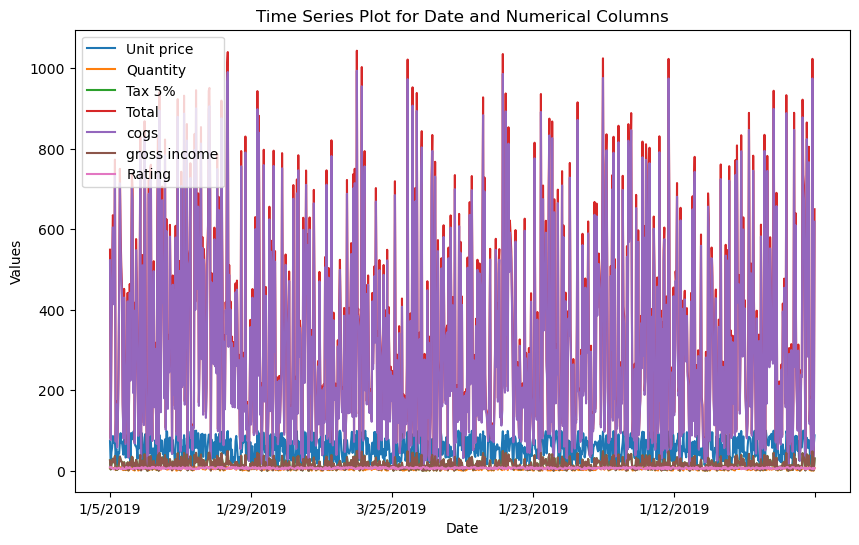

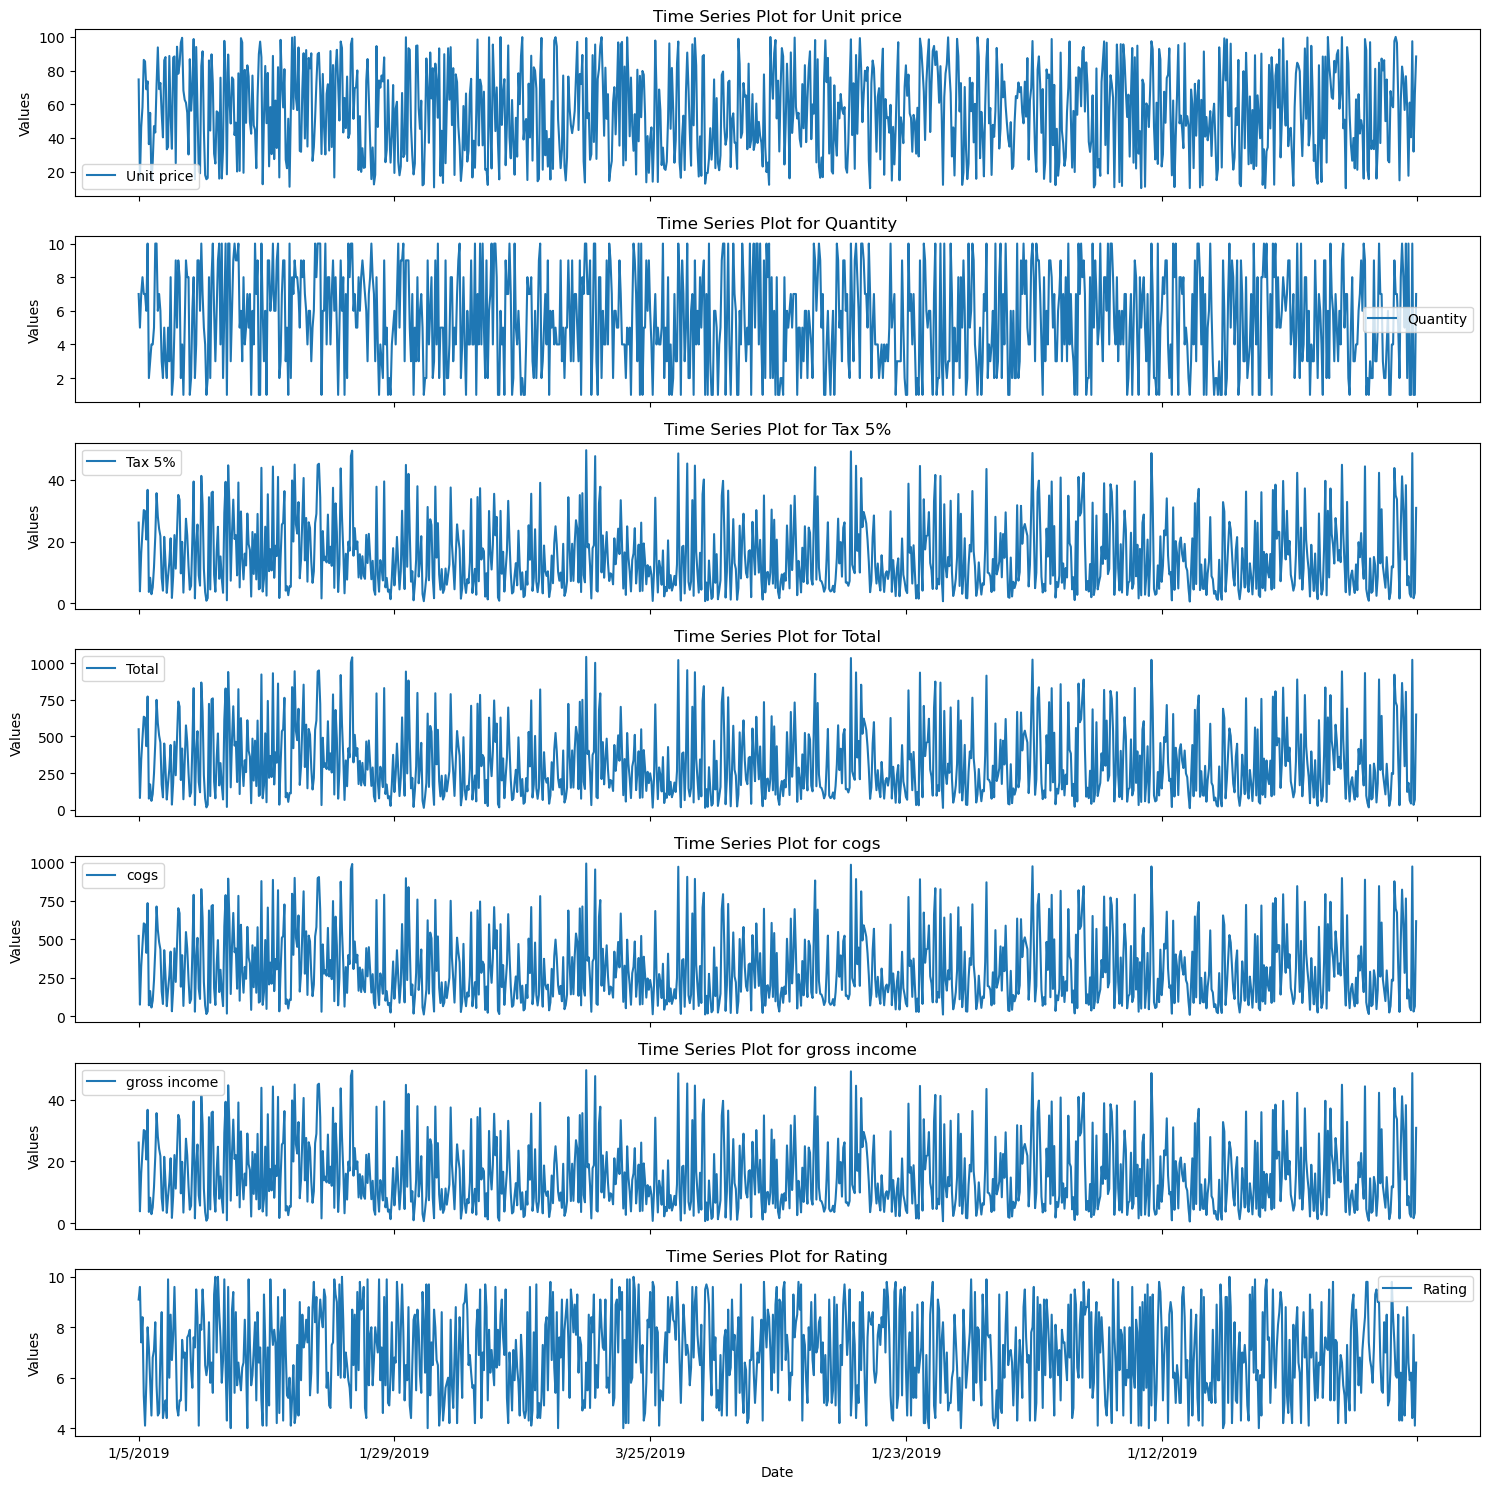

In [25]:


# Set the date column as the index
#supermarket_sales.set_index('Date', inplace=True)
n_col=['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating']

# Plot the time series
supermarket_sales[n_col].plot(figsize=(10, 6))
plt.title('Time Series Plot for Date and Numerical Columns')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.show()



fig, axes = plt.subplots(nrows=len(n_col), ncols=1, figsize=(15, 15), sharex=True)

for i, column in enumerate(n_col):
    supermarket_sales[column].plot(ax=axes[i], legend=True)
    axes[i].set_title(f'Time Series Plot for {column}')
    axes[i].set_ylabel('Values')

# Set common x-axis label
plt.xlabel('Date')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


## The above time series plots interprete the realtionship date and numerical values of this data set('Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating'). the values axis(Vertical axis ) shows the total amount of the numerical columns on that practicular date.

## Question - 05

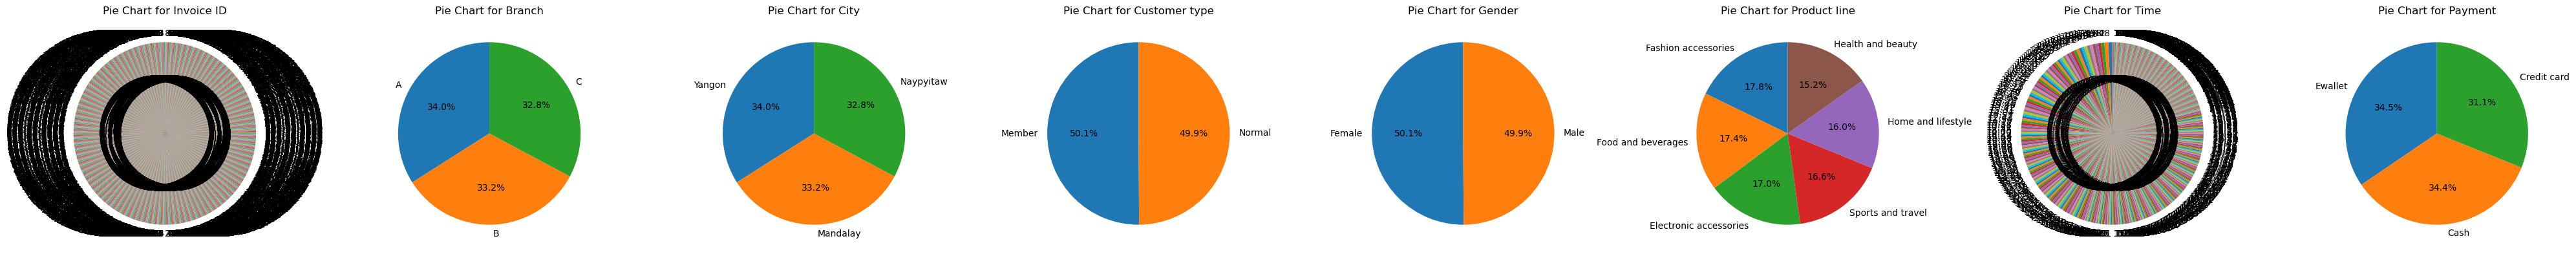

In [44]:


# Identify categorical columns
categorical_columns = supermarket_sales.select_dtypes(include=['object']).columns



# Create subplots for each categorical column
num_subplots = len(categorical_columns)
fig, axs = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))

# Plot pie charts for each categorical column
for i, column in enumerate(categorical_columns):
    category_count = supermarket_sales[column].value_counts()
    axs[i].pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Pie Chart for {column}')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()



## The above pie charts of branch, City, Product line and payment illustrates all their specified categories have divided into equal parts. like male and female customers are approximately same likewise.

## Question-06

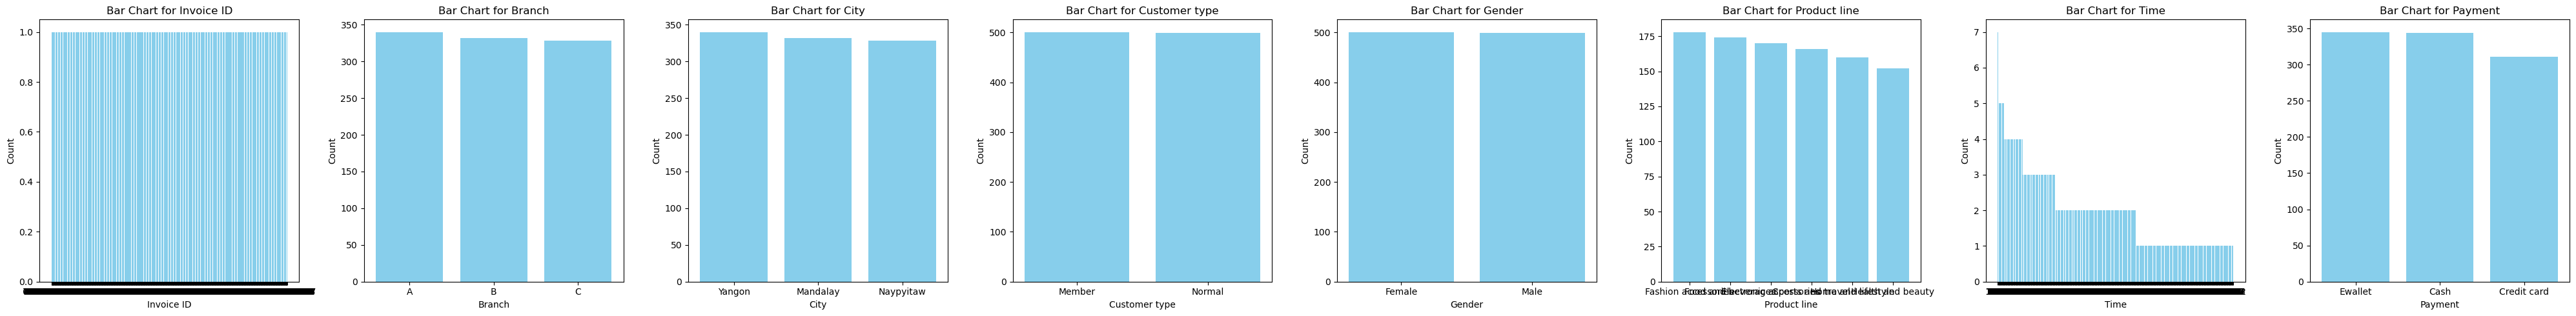

In [46]:


# Identify categorical columns
categorical_columns = supermarket_sales.select_dtypes(include=['object']).columns




# Create subplots for each categorical column
num_subplots = len(categorical_columns)
fig, axs = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))

# Plot bar charts for each categorical column
for i, column in enumerate(categorical_columns):
    category_count = supermarket_sales[column].value_counts()
    axs[i].bar(category_count.index, category_count, color='skyblue')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Bar Chart for {column}')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()



## The above bar graphs also illustrate the same thing that pie chart illustration.


## Question-07

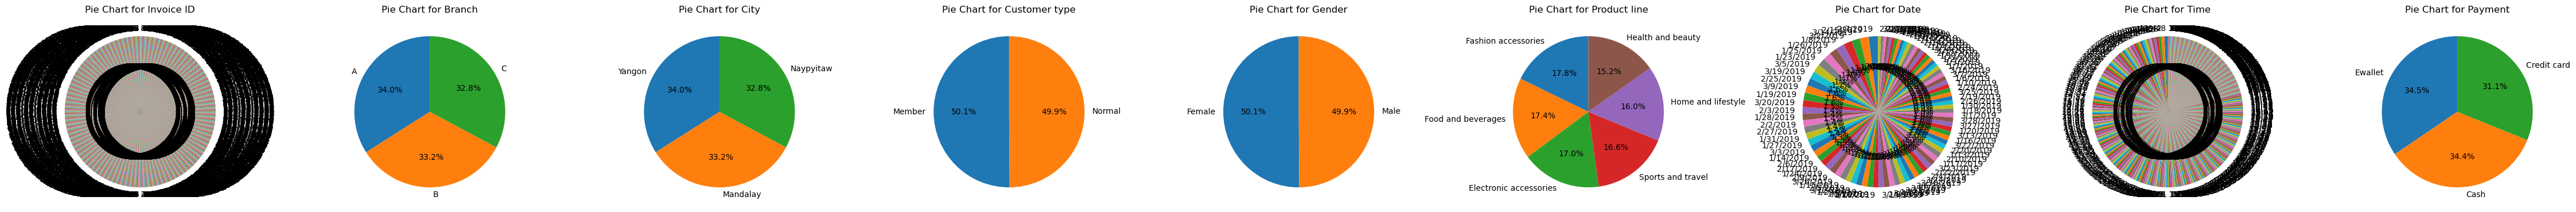

In [4]:
# Identify categorical columns
categorical_columns = supermarket_sales.select_dtypes(include=['object']).columns



# Create subplots for each categorical column
num_subplots = len(categorical_columns)
fig, axs = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))

# Plot pie charts for each categorical column
for i, column in enumerate(categorical_columns):
    category_count = supermarket_sales[column].value_counts()
    axs[i].pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Pie Chart for {column}')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

## Question-08

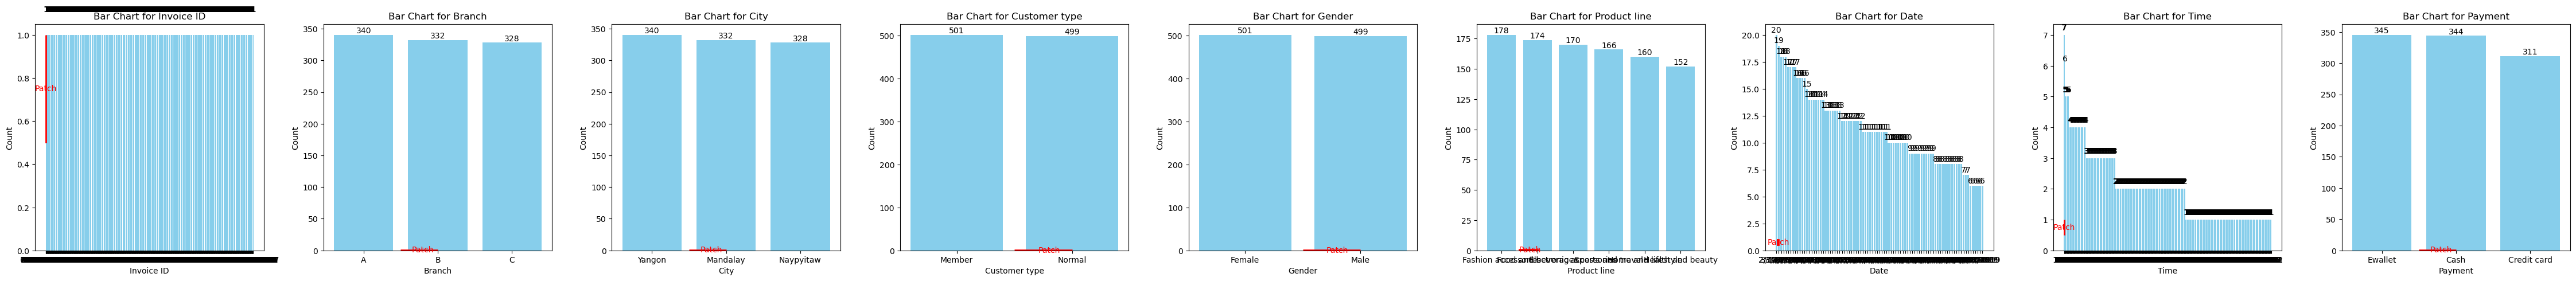

In [8]:
# Identify categorical columns
categorical_columns = supermarket_sales.select_dtypes(include=['object']).columns




# Create subplots for each categorical column
num_subplots = len(categorical_columns)
fig, axs = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))

# Plot bar charts for each categorical column
for i, column in enumerate(categorical_columns):
    category_count = supermarket_sales[column].value_counts()
    axs[i].bar(category_count.index, category_count, color='skyblue')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Bar Chart for {column}')

    
    
# Add text annotation
    for index, value in enumerate(category_count):
        axs[i].text(index, value + 0.1, str(value), ha='center', va='bottom')

    # Add a patch (Rectangle)
    rect = plt.Rectangle((0.5, 0.5), 0.5, 0.5, fill=None, edgecolor='red', linewidth=2)
    axs[i].add_patch(rect)
    axs[i].text(0.8, 0.75, 'Patch', color='red', ha='center', va='center')
# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

## Question-09

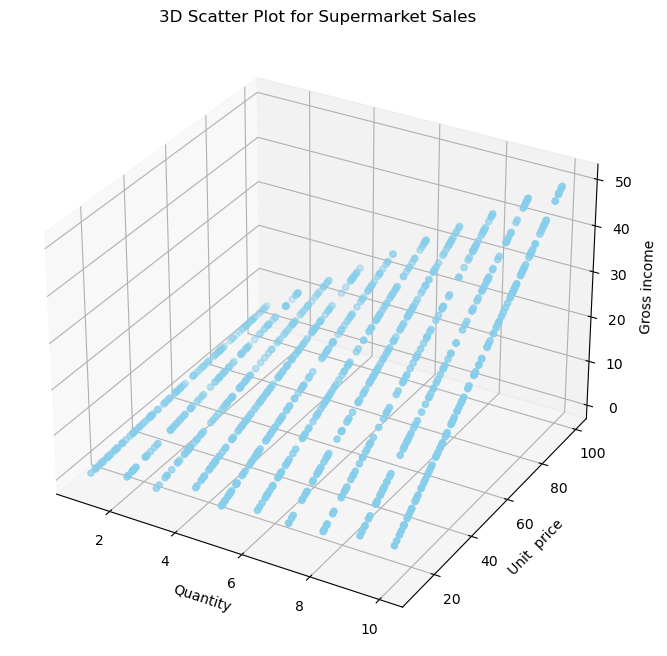

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(supermarket_sales['Quantity'], supermarket_sales['Unit price'], supermarket_sales['gross income'], c='skyblue', marker='o')

# Set labels
ax.set_xlabel('Quantity')
ax.set_ylabel('Unit  price')
ax.set_zlabel('Gross income')
ax.set_title('3D Scatter Plot for Supermarket Sales')

# Show the plot
plt.show() 

## The above 3-D scatter plot shows the relationship between quantity, Revenue and Gross income

## Question-10

+ The bar charts and pie charts provide a visual representation of product categories, branches, and customer types. By analyzing these charts, stakeholders can optimize inventory management by identifying top-selling products, understanding the popularity of certain product lines, and tailoring stock levels based on customer preferences.


+ The 3D scatter plot illustrates the relationship between quantity, gross income, and unit price. Stakeholders can leverage this chart to gain insights into customer purchasing patterns. For example, understanding which products contribute most to gross income and unit price can guide decision-making on promotions, discounts, and product bundling to enhance customer satisfaction and loyalty


+ By analyzing the charts related to payment methods, product lines, and customer types, stakeholders can uncover market trends. This information is crucial for adapting business strategies to changing customer preferences and staying competitive in highly populated cities. For instance, identifying the preferred payment methods can inform decisions about digital payment solutions or loyalty programs.


+ The combination of bar charts, pie charts, and a 3D scatter plot provides a comprehensive overview of various aspects of supermarket sales. Stakeholders can use these visuals to conduct in-depth analyses, exploring correlations between different attributes and making data-driven decisions.


+ The message to the audience is to leverage predictive analytics for more advanced insights and forecasting. The historical sales data serves as a foundation for predictive modeling. For example, machine learning algorithms can be applied to predict future sales, identify seasonal trends, and optimize pricing strategies.


+ Overall, the objective is to encourage the audience to use the dataset for deriving actionable insights. Whether it's tailoring marketing campaigns, improving supply chain efficiency, or enhancing the overall customer experience, the charts presented facilitate a data-driven approach to business strategies.


## In summary, the charts aim to empower stakeholders with the tools needed to make informed decisions, optimize operations, and drive success in the competitive landscape of supermarket retailing. 